In [2]:
%matplotlib inline
%config Completer.use_jedi = False

In [203]:
BASE_PATH = "/Users/sergmiller/Downloads/АУФ 4 Профессии/"
BASE_FILE = "INSTA NEW-{:02d}.png"

In [4]:
import os

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [238]:
img = plt.imread(os.path.join(BASE_PATH, BASE_FILE.format(1)))

In [241]:
img2 = plt.imread(os.path.join(BASE_PATH, BASE_FILE.format(5)))

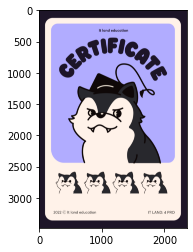

In [239]:
plt.imshow(img)

In [103]:
color = img[500][500]

In [149]:
color * 255

array([177., 172., 255., 255.], dtype=float32)

In [127]:
def get_color_mask(img, color):
    return np.array((np.mean(img == color, axis=-1) == 1.0).reshape(img.shape[0], img.shape[1], -1).repeat(4,-1), dtype=np.float)

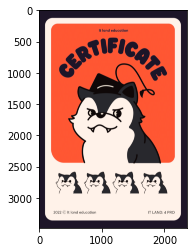

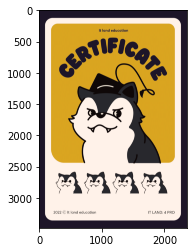

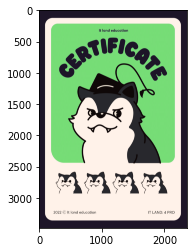

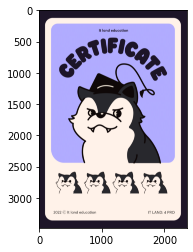

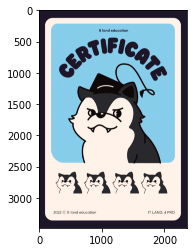

In [155]:
COLORS = ["orange", "yellow", "green", "purple", "blue"]

mask = get_color_mask(img, color)
colors = [
    [255, 87, 51],# orange
    [218,165,32], # gold
    [119,221,119], # green(pastel)
    [177., 172., 255.], #purple(Dima's)
    [135,206,235],# blue(sky)
]
for i,c in enumerate(colors):
    new_color = np.array(c + [255,], dtype=float) / 255
    pc = img *(1 - mask) +  new_color * mask
    plt.imshow(pc)
    plt.show()
    plt.imsave("wolf_backgrounds/{}.png".format(COLORS[i]), pc)

In [156]:
import pandas as pd

In [170]:
students = pd.read_csv(os.path.join(BASE_PATH, "students.tsv"), sep='\t', skiprows=1)

In [351]:
# students.head()

In [329]:
TREKS = ["Дизайн", "Менеджер", "НоуКод", "Разработчик"]
TREK_ATTR_NAME = ["UX/UI", "PRODUCT", "NO-CODE", "DEV"]
TREKS2NAME = {t:a for t,a in zip(TREKS, TREK_ATTR_NAME)}

def get_treks(s):
    s = s.replace(' ', '').split(',')
    for c in s:
        assert c in TREKS, c
    return [t in s for t in TREKS]

In [330]:
students["treks"] = [get_treks(v) for v in students["Направления"].values]

In [186]:
students["Ставим имя на NFT-дипломе? \n(если в столбце Имя - неправльное или неполное - укажите полное)"].values

array([False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False])

In [352]:
# students["Комментарий"].values

In [287]:
from collections import Counter

Counter([np.sum(x) for x in students["treks"].values])

Counter({1: 14, 2: 16, 3: 7, 4: 5})

In [299]:
np.array(TREK_ATTR_NAME)[np.where(students['treks'].values[0])]

array(['DESIGN'], dtype='<U10')

In [297]:
np.array(students['treks'].values[0])

array([ True, False, False, False])

In [307]:
np.array(TREK_ATTR_NAME)[np.where(students['treks'].values[0])]

array(['DESIGN'], dtype='<U10')

In [335]:
def treks_to_rarity(trek_attrs):
    l = len(trek_attrs)
    assert l >= 1 and l <= 4
    if l == 4:
        return "MYTHIC_RARE"
    if l == 3:
        return "RARE"
    if l == 1:
        return "COMMON"
    if "NO-CODE" in trek_attrs and "UX/UI" in trek_attrs:
        return "UNCOMMON"
    return "UNCOMMON_SPECIAL"


RARITY_TO_COLOR = {
    "COMMON": "green",
    "UNCOMMON": "blue",
    "UNCOMMON_SPECIAL": "purple",
    "RARE": "yellow",
    "MYTHIC_RARE": "orange"
}

In [318]:
np.random.seed(42)
heads = np.random.randint(0, 2, students.shape[0])
bodys = np.random.randint(0, 6, students.shape[0])
print(heads, bodys)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0] [1 3 3 5 5 5 2 3 3 0 2 4 2 4 0 1 3 0 3 5 1 1 0 1 4 1 3 3 3 3 4 2 5 0 3 1 3
 1 5 5 5 1]


In [274]:
def get_mask_by_channel4(img):
    return np.array((img[:, :, 3] == 1).reshape(img.shape[0], img.shape[1], -1).repeat(4,-1), dtype=np.float)

In [280]:
def build_diploma(good_treks, bad_treks, bg, head, body):
    bg = plt.imread(FLAT_ATTRIBUTE_TO_FILE[bg])
    head = plt.imread(FLAT_ATTRIBUTE_TO_FILE[head])
    body = plt.imread(FLAT_ATTRIBUTE_TO_FILE[body])
    good_treks = [plt.imread(FLAT_ATTRIBUTE_TO_FILE[t]) for t in good_treks]
    bad_treks = [plt.imread(FLAT_ATTRIBUTE_TO_FILE[t]) for t in bad_treks]
    assert len(good_treks) > 0 and len(good_treks) + len(bad_treks) == 4
    im = bg
    for c in [head, body] + good_treks + bad_treks:
        c = c[:im.shape[0], :im.shape[1], :]
        mask = get_mask_by_channel4(c)
        im = im * (1-mask) + c * mask
    im = np.clip(im, 0, 1)
    return im

In [319]:
HEADS = ["classic", "style"]
BODYS = ["hoodie", "laptop", "phone", "smoothie", "wok", "coffee"]

FLAT_ATTRIBUTE_TO_FILE = {}

FLAT_ATTRIBUTE_TO_FILE["head_classic"] = os.path.join(BASE_PATH, BASE_FILE.format(5))
FLAT_ATTRIBUTE_TO_FILE["head_style"] = os.path.join(BASE_PATH, BASE_FILE.format(6))

FLAT_ATTRIBUTE_TO_FILE["body_hoodie"] = os.path.join(BASE_PATH, BASE_FILE.format(7))
FLAT_ATTRIBUTE_TO_FILE["body_laptop"] = os.path.join(BASE_PATH, BASE_FILE.format(8))
FLAT_ATTRIBUTE_TO_FILE["body_phone"] = os.path.join(BASE_PATH, BASE_FILE.format(9))
FLAT_ATTRIBUTE_TO_FILE["body_smoothie"] = os.path.join(BASE_PATH, BASE_FILE.format(10))
FLAT_ATTRIBUTE_TO_FILE["body_wok"] = os.path.join(BASE_PATH, BASE_FILE.format(11))
FLAT_ATTRIBUTE_TO_FILE["body_coffee"] = os.path.join(BASE_PATH, BASE_FILE.format(12))

for c in COLORS:
    FLAT_ATTRIBUTE_TO_FILE["bg_" + c] = "wolf_backgrounds/" + c + ".png"

FLAT_ATTRIBUTE_TO_FILE["good_DEV"] = os.path.join(BASE_PATH, BASE_FILE.format(13))
FLAT_ATTRIBUTE_TO_FILE["good_PRODUCT"] = os.path.join(BASE_PATH, BASE_FILE.format(14))
FLAT_ATTRIBUTE_TO_FILE["good_NO-CODE"] = os.path.join(BASE_PATH, BASE_FILE.format(15))
FLAT_ATTRIBUTE_TO_FILE["good_UX/UI"] = os.path.join(BASE_PATH, BASE_FILE.format(16))

FLAT_ATTRIBUTE_TO_FILE["bad_DEV"] = os.path.join(BASE_PATH, BASE_FILE.format(20))
FLAT_ATTRIBUTE_TO_FILE["bad_PRODUCT"] = os.path.join(BASE_PATH, BASE_FILE.format(19))
FLAT_ATTRIBUTE_TO_FILE["bad_NO-CODE"] = os.path.join(BASE_PATH, BASE_FILE.format(18))
FLAT_ATTRIBUTE_TO_FILE["bad_UX/UI"] = os.path.join(BASE_PATH, BASE_FILE.format(17))

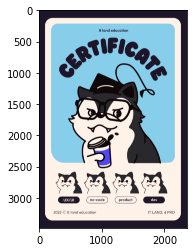

In [282]:
d = build_diploma(
    ["good_DEV", "good_UX/UI"],
    ["bad_PRODUCT", "bad_NO-CODE"],
    "bg_blue", "head_classic", "body_coffee")
plt.imshow(d)

In [353]:
user_attributes = []
mails = []
names = []

for s in students.iterrows():
    i = s[0]
    s = s[1]
    mail = s["Почта"]
    treks = get_treks(s["Направления"])
    name = s["Комментарий"] # name or nan
    trek_attrs = np.array(TREK_ATTR_NAME)[np.where(treks)]
    bad_trek_attrs = np.array([t for t in TREK_ATTR_NAME if t not in trek_attrs])
    rarity = treks_to_rarity(trek_attrs)
    bg_color = RARITY_TO_COLOR[rarity]
    head = HEADS[heads[i]]
    body = BODYS[bodys[i]]
    print(i, mail, name, rarity, bg_color, trek_attrs, bad_trek_attrs, head, body)
    attrs = {}
    attrs["ITEM"] = body.upper()
    attrs["GLASSES"] = head.upper()
    attrs["BACKGROUND"] = bg_color.upper()
    attrs["SERIES"] = "WOLF_V1"
    attrs["RARITY"] = rarity
    check = lambda s: "YES" if s in trek_attrs else "NO"
    for t in TREK_ATTR_NAME:
        attrs[t] = check(t)
        
    user_attributes.append(attrs)
    mails.append(mail)
    names.append(name)
    print(attrs)
    print()
    img = build_diploma(
    ["good_" + c for c in trek_attrs],
    ["bad_" + c for c in bad_trek_attrs],
    "bg_" + bg_color, "head_" + head, "body_" + body)
    plt.imshow(img)
    plt.show()
    plt.imsave("wolfs_gen/{}.png".format(i), img)

In [350]:
df = pd.DataFrame()
df["mails"] = mails
df["names"] = names
df["user_attributes"] = user_attributes
df.to_csv("user_attributes.csv")